### Previsões com KERAS

### Importação de bibliotecas

In [1]:
import pandas as pd

### Carregando a base de dados

In [2]:
passageiros = pd.read_csv('dados/Passageiros.csv')
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


#### Na coluna tempo, temos os anos e, na parte decimal, os meses.

### Ajustando o tamanho dos gráficos de todo o código

In [3]:
import matplotlib as mpl

In [4]:
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

### Visualizando a série temporal com o lineplot, do seaborn

In [5]:
import seaborn as sns

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

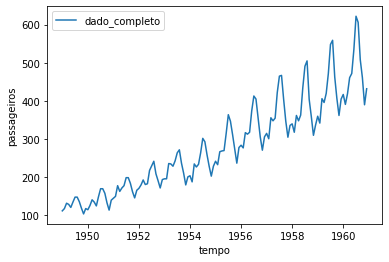

In [6]:
sns.lineplot(x = 'tempo', y = 'passageiros', data = passageiros,
             label = 'dado_completo')

### Escalando os dados

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
# Ajustando os dados para escalá-los. 

# É mais fácil fazer previsões com números numa mesma escala.

# instanciando o modelo
sc = StandardScaler()

# Treinando com nossos dados
sc.fit(passageiros)

StandardScaler()

In [9]:
# Transformando os dados

dado_escalado  = sc.transform(passageiros)

### Dividindo os dados em x e Y. Os valores de entrada (x) serão os anos (coluna 0) e os valores de saída desejados (y) será a quantidade de passageiros (coluna 1)

In [10]:
# Tudo da coluna 0
x = dado_escalado[:, 0]

# Tudo da coluna 1

y = dado_escalado[:, 1]

### Plotando o grafico novamente, mas agora com os dados escalados

Text(0.5, 0, 'Data')

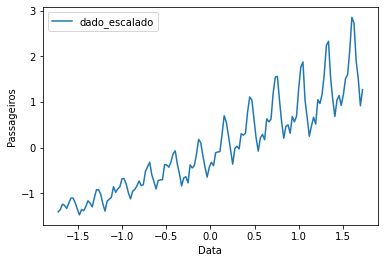

In [11]:
import matplotlib.pyplot as plt

# Quero adicionar labels nos eixos
sns.lineplot(x = x, y = y, label = 'dado_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')

### Dividir os dados em dados de treino e dados de teste

In [12]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = int(len(passageiros) - tamanho_treino)

In [13]:
# Dividindo:

x_treino = x[0:tamanho_treino]
y_treino = y[0:tamanho_treino]

x_teste = x[tamanho_treino:len(passageiros)]
y_teste = y[tamanho_treino:len(passageiros)]

### Plotando os dados de TREINO e de TESTE

<AxesSubplot:>

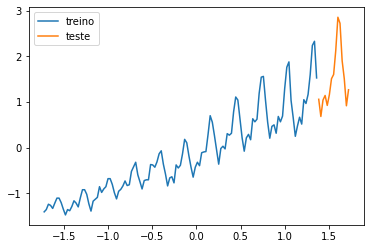

In [14]:
sns.lineplot(x = x_treino, y = y_treino, label = 'treino')
sns.lineplot(x = x_teste, y = y_teste, label = 'teste')

### Criando uma sequência de camadas - Sequential()

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [34]:
#!pip install tensorflow

In [35]:
regressor = Sequential()

In [18]:
# Adicionando uma camada Dense

regressor.add(Dense(1, input_dim = 1, kernel_initializer='Ones',
                    activation = 'linear', use_bias = False))

In [19]:
regressor.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [20]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [21]:
regressor.fit(x_treino,y_treino)

5/5 [==============================] - 0s 1ms/step - loss: 0.1285


In [22]:
y_predict = regressor.predict(x_treino)

<AxesSubplot:>

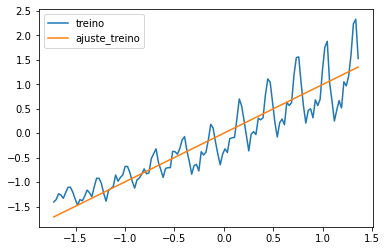

In [23]:
sns.lineplot(x = x_treino, y = y_treino, label = 'treino')
sns.lineplot(x = x_treino, y = y_predict[:,0], label = 'ajuste_treino')

### Visualizando os dados novamente na escala normal

In [24]:
# Criando uma variável temporária:

temp = {'tempo' : x_treino, 'passageiros': y_predict[:,0]}

resultados = pd.DataFrame(data = temp)
resultados

,tempo,passageiros
0,-1.720064,-1.712864
1,-1.696007,-1.688908
2,-1.671950,-1.664952
3,-1.647894,-1.640996
4,-1.623837,-1.617040
...,...,...
124,1.262984,1.257697
125,1.287041,1.281654
126,1.311098,1.305610
127,1.335155,1.329566


In [25]:
# Transformando os dados:

resultado_transformado = sc.inverse_transform(resultados)

In [26]:
resultado_transformado = pd.DataFrame(data=resultado_transformado)
resultado_transformado.columns = ['tempo', 'passageiros']
resultado_transformado

,tempo,passageiros
0,1949.000000,75.527342
1,1949.083333,78.391281
2,1949.166667,81.255219
3,1949.250000,84.119143
4,1949.333333,86.983081
...,...,...
124,1959.333333,430.655137
125,1959.416667,433.519076
126,1959.500000,436.383000
127,1959.583333,439.246924


<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

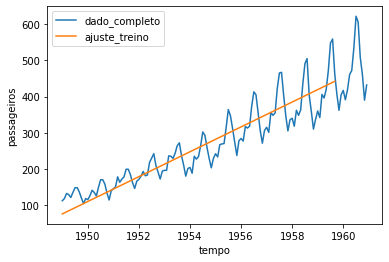

In [27]:
# plotando o resultado correto:

sns.lineplot(x = 'tempo', y = 'passageiros', data = passageiros, label = 'dado_completo')
sns.lineplot(x = 'tempo', y = 'passageiros', data = resultado_transformado, label = 'ajuste_treino')

### Note que a linha de regressão abrange os dados de TREINO. Quero uma linha regressora que abranja também os dados de TESTE, ou seja, faça uma predição.

In [28]:
y_predict_teste = regressor.predict(x_teste)

In [29]:
temp = {'tempo': x_teste, 'passageiros': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=temp)
resultados_teste.columns = ['tempo', 'passageiros']

In [30]:
resultado_transformado_teste = sc.inverse_transform(resultados_teste)

In [31]:
resultado_transformado_teste = pd.DataFrame(data = resultado_transformado_teste)
resultado_transformado_teste.columns = ['tempo', 'passageiros']
resultado_transformado_teste

,tempo,passageiros
0,1959.750000,444.974800
1,1959.833333,447.838739
2,1959.916667,450.702663
3,1960.000000,453.566601
4,1960.083333,456.430539
5,1960.166667,459.294463
6,1960.250000,462.158416
7,1960.333333,465.022340
8,1960.416667,467.886264
9,1960.500000,470.750202


### Plotando a reta de regressão também dos dados de teste:

<AxesSubplot:xlabel='tempo', ylabel='passageiros'>

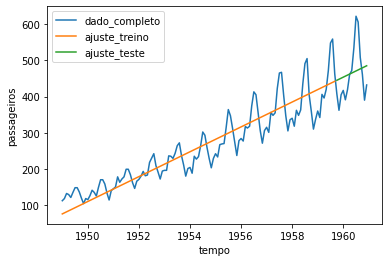

In [32]:
sns.lineplot(x = 'tempo', y = 'passageiros', data = passageiros, label = 'dado_completo')
sns.lineplot(x = 'tempo', y = 'passageiros', data = resultado_transformado, label = 'ajuste_treino')
sns.lineplot(x = 'tempo', y = 'passageiros', data = resultado_transformado_teste, label = 'ajuste_teste')

### Criando uma nova rede neural - Rede com mais camadas, porém ainda fornecerá uma previsão LINEAR (veja função de ativação)

In [36]:
regressor2 = Sequential()

In [37]:
# quero 8 neuronios na camada escondida, que é a seguinte a camada de entrada

regressor2.add(Dense(8,input_dim = 1, kernel_initializer = 'random_uniform',
                     activation = 'linear', use_bias = False)) 

# Criando outra camada escondida com 8 neuronios: (não preciso passar o input_dim pq ele ja pega da camada anterior
regressor2.add(Dense(8, kernel_initializer = 'random_uniform',
               activation = 'linear', use_bias = False))

# Camada de saída:
regressor2.add(Dense(1, kernel_initializer = 'random_uniform',
                     activation = 'linear', use_bias = False))

In [41]:
# Compilando a rede:

regressor2.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [42]:
regressor2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Fazendo o treinamento: 
# Valor padrao de epochs é 5

regressor2.fit(x_treino, y_treino, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8094
Epoch 2/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8087
Epoch 3/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8078
Epoch 4/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8066
Epoch 5/200
5/5 [==============================] - 0s 902us/step - loss: 0.8048
Epoch 6/200
5/5 [==============================] - 0s 1ms/step - loss: 0.8027
Epoch 7/200
5/5 [==============================] - 0s 955us/step - loss: 0.7996
Epoch 8/200
5/5 [==============================] - 0s 903us/step - loss: 0.7955
Epoch 9/200
5/5 [==============================] - 0s 918us/step - loss: 0.7896
Epoch 10/200
5/5 [==============================] - 0s 864us/step - loss: 0.7823
Epoch 11/200
5/5 [==============================] - 0s 866us/step - loss: 0.7721
Epoch 12/200
5/5 [==============================] - 0s 864us/step - loss: 0.7605
Epoch 13/200
5/5 [=============================

In [46]:
# Fazendo o predict para os valores de TREINO

y_predict = regressor2.predict(x_treino)

In [45]:
# Fazendo o predict para os valores de TESTE

y_predict_teste = regressor2.predict(x_teste)

<AxesSubplot:>

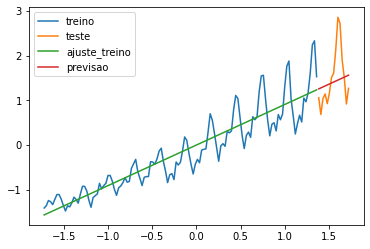

In [49]:
# Plotando os resultados:

# Plotando primeiro os dados
sns.lineplot(x = x_treino, y = y_treino, label = 'treino')
sns.lineplot(x = x_teste, y = y_teste, label = 'teste')

# Plotando as previsões:
sns.lineplot(x = x_treino, y = y_predict[:,0], label = 'ajuste_treino')
sns.lineplot(x = x_teste, y = y_predict_teste[:,0], label = 'previsao')

### Previsões não lineares

In [50]:
regressor3 = Sequential()

In [51]:
# Primeira camada escondida, com 8 neuronios e utilizando a função de ativação sigmoide:
regressor3.add(Dense(8, input_dim = 1, kernel_initializer = 'random_uniform',
                    activation = 'sigmoid', use_bias = False))

# Segunda camada escondida, com 8 neuronios e unitilizando a função de ativação sigmoide:
regressor3.add(Dense(8, kernel_initializer = 'random_uniform',
                    activation = 'sigmoid', use_bias = False))

# Camada de saída:
regressor3.add(Dense(1, kernel_initializer = 'random_uniform',
                     activation = 'linear', use_bias = False))


regressor3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 8         
                                                                 
 dense_5 (Dense)             (None, 8)                 64        
                                                                 
 dense_6 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Compilando a rede:

regressor3.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [55]:
# Treinando o modelo:

regressor3.fit(x_treino, y_treino, epochs = 500)

Epoch 1/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8140
Epoch 2/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8088
Epoch 3/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8032
Epoch 4/500
5/5 [==============================] - 0s 1ms/step - loss: 0.8000
Epoch 5/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7973
Epoch 6/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7966
Epoch 7/500
5/5 [==============================] - 0s 988us/step - loss: 0.7957
Epoch 8/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7948
Epoch 9/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7940
Epoch 10/500
5/5 [==============================] - 0s 746us/step - loss: 0.7931
Epoch 11/500
5/5 [==============================] - 0s 733us/step - loss: 0.7923
Epoch 12/500
5/5 [==============================] - 0s 669us/step - loss: 0.7914
Epoch 13/500
5/5 [==============================] - 0

In [56]:
# Fazendo as previsões de TREINO:

y_predict = regressor3.predict(x_treino)

# Fazendo as previsões de TESTE:

y_predict_teste = regressor3.predict(x_teste)

<AxesSubplot:>

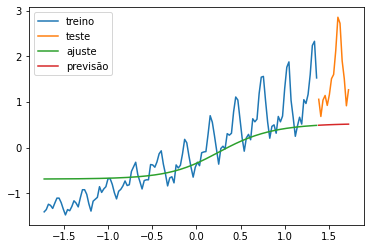

In [57]:
# Plotando os valores:

# Valores de treino:
sns.lineplot(x = x_treino, y = y_treino, label = 'treino')

# Valores de teste:
sns.lineplot(x = x_teste, y = y_teste, label = 'teste')

# Previsões de treino:
sns.lineplot(x = x_treino, y = y_predict[:,0], label = 'ajuste')

# Previsões:
sns.lineplot(x = x_teste, y = y_predict_teste[:,0], label = 'previsão')


### Note que a previsão NÃO ficou boa.

## Notas:

### Otimizador ADAM: É o responsável pela atualização dos pesos. Este algoritmo é exemplo de um método de gradiente descendente estocástico desenvolvido para ser computacionalmente eficiente. Para saber como funciona: [TEXTO](https://cursos.alura.com.br/course/rede-neural-numpy/task/57827)

### Função de custo (losses): Em conjunto com o algoritmo de otimização precisamos utilizar uma função de custo que vai medir quanto a nossa estimativa é diferente do valor conhecido. O algoritmo de otimização busca minimizar o valor da função de custo. Diferentes funções de custo presentes no KERAS: [Funções de custo](https://www.tensorflow.org/api_docs/python/tf/keras/losses)

***

## Enxergando os dados do problema de maneira diferente:

### Podemos ter como dado de *entrada e de saída* o número de passageiros. Seria útil, por exemplo, para prevermos, no ano seguinte, quantos passageiros voarão. 

### Para essa abordagem, a quantidade de passageiros tem um atraso em relação ao ano, tendo em vista que utilizandos o número de passageiros de um ano para prever o número de passageiros do próximo.

### Ex.: Passamos o número de passageiros de 2021 e queremos saber o número de passageiros de 2022. Assim:

### passageiro_2021 será usado para prever o passageiro_2022

In [61]:
# Criando uma função que considera esse "atraso"

import numpy as np

vetor = pd.DataFrame(y_treino)[0]

# Vetor: vetor de número de passageiros
# n_passos: atraso do vetor 

# X_novo: versão atrasada do numero de passageiros
# y_novo: versão futura, número de passageiros que queremos prever

def separa_dados(vetor, n_passos):
    
    X_novo, y_novo = [], []
    
    for i in range(n_passos, vetor.shape[0]): # percorrer o vetor de entrada
        
        X_novo.append(list(vetor.loc[i-n_passos:i-1]))
        y_novo.append(vetor.loc[i])
    
    # Passando para array do numpy (até então eram dfs)
    X_novo, y_novo = np.array(X_novo), np.array(y_novo)
    
    return X_novo, y_novo
                              

In [62]:
# Como funciona a função:

x_treino_novo, y_treino_novo = separa_dados(vetor, 1)

In [64]:
x_treino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [66]:
y_treino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

### Note que o primeiro valor do x_treino_novo não aparece no y_treino_novo, devido ao atraso de 1 passo (1 ano)

In [67]:
# Fazendo isso para os dados de teste:

vetor2 = pd.DataFrame(y_teste)[0]

x_teste_novo, y_teste_novo = separa_dados(vetor2, 1)

### Criando uma nova rede

In [69]:
regressor4 = Sequential()

In [71]:
# Camada escondida 1:
regressor4.add(Dense(8, input_dim = 1, kernel_initializer = 'random_uniform',
                     activation = 'linear', use_bias = False))

# Camada escondida 2:
regressor4.add(Dense(64, kernel_initializer = 'random_uniform',
                     activation = 'sigmoid', use_bias = 'False'))

# Camada de saída:
regressor4.add(Dense(1, kernel_initializer = 'random_uniform',
                     activation = 'linear', use_bias = False))

regressor4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 8         
                                                                 
 dense_8 (Dense)             (None, 64)                576       
                                                                 
 dense_9 (Dense)             (None, 1)                 64        
                                                                 
 dense_10 (Dense)            (None, 8)                 8         
                                                                 
 dense_11 (Dense)            (None, 64)                576       
                                                                 
 dense_12 (Dense)            (None, 1)                 64        
                                                                 
Total params: 1,296
Trainable params: 1,296
Non-traina

In [72]:
# Compilando:

regressor4.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [73]:
# Treinamento:

regressor4.fit(x_treino_novo, y_treino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7871
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7775
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7765
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7764
Epoch 5/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7754
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7743
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7740
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7748
Epoch 9/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7739
Epoch 10/100
4/4 [==============================] - 0s 935us/step - loss: 0.7737
Epoch 11/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7744
Epoch 12/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7737
Epoch 13/100
4/4 [==============================] - 0s 1ms/

In [75]:
# Predição dos dados de treino:
y_predict_novo = regressor4.predict(x_treino_novo)

# Predição dos dados de teste:
y_predict_teste_novo = regressor4.predict(x_teste_novo)

In [77]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<AxesSubplot:xlabel='tempo', ylabel='0'>

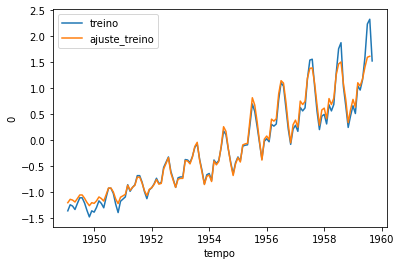

In [76]:
# Plotando os dados:

sns.lineplot(x = 'tempo', y = y_treino_novo, data = passageiros[1:129], label = 'treino')
sns.lineplot(x = 'tempo', y = pd.DataFrame(y_predict_novo)[0], data = passageiros[1:129], label = 'ajuste_treino')

<AxesSubplot:xlabel='tempo', ylabel='0'>

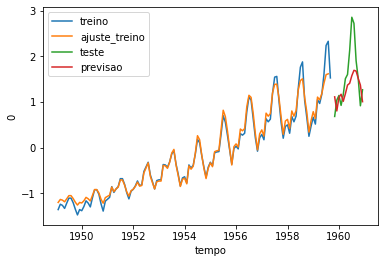

In [80]:
# Plotando as predições:

sns.lineplot(x = 'tempo', y = y_treino_novo, data = passageiros[1:129], label = 'treino')
sns.lineplot(x = 'tempo', y = pd.DataFrame(y_predict_novo)[0], data = passageiros[1:129], label = 'ajuste_treino')
sns.lineplot(x = 'tempo', y = y_teste_novo, data = passageiros[130:144], label = 'teste')
sns.lineplot(x = 'tempo', y = resultado.values, data = passageiros[130:144], label = 'previsao')

### Utilizando um n-passos diferente de 1

In [81]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 4)

In [82]:
x_treino_novo[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [83]:
y_treino_novo[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

### Note que agora utilizamos 4 valores para estimar 1 dado de saída. Essa técnica pode melhorar a precisão da previsão.

In [84]:
x_teste_novo, y_teste_novo = separa_dados(vetor2, 4)

### Criando uma nova rede:

In [88]:
regressor5 = Sequential()

In [89]:
# Camada escondida 1:
regressor5.add(Dense(8, input_dim = 4, kernel_initializer = 'random_uniform',
                     activation = 'linear', use_bias = False))

# Camada escondida 2:
regressor5.add(Dense(64, kernel_initializer = 'random_uniform',
                     activation = 'sigmoid', use_bias = False))

# Camada de saída:
regressor5.add(Dense(1, kernel_initializer = 'random_uniform',
                     activation = 'linear', use_bias = False))

regressor5.summary()                     

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 8)                 32        
                                                                 
 dense_20 (Dense)            (None, 64)                512       
                                                                 
 dense_21 (Dense)            (None, 1)                 64        
                                                                 
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


In [90]:
# Compilando:

regressor5.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [91]:
# Treinamento:

regressor5.fit(x_treino_novo, y_treino_novo, epochs = 300)

Epoch 1/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7816
Epoch 2/300
4/4 [==============================] - 0s 920us/step - loss: 0.7608
Epoch 3/300
4/4 [==============================] - 0s 957us/step - loss: 0.7589
Epoch 4/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7588
Epoch 5/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7560
Epoch 6/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7523
Epoch 7/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7484
Epoch 8/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7434
Epoch 9/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7377
Epoch 10/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7306
Epoch 11/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7219
Epoch 12/300
4/4 [==============================] - 0s 965us/step - loss: 0.7124
Epoch 13/300
4/4 [==============================] - 0s 

In [93]:
# Predições:

y_predict_novo = regressor5.predict(x_treino_novo)

y_predict_teste_novo = regressor5.predict(x_teste_novo)

In [108]:
resultado_treino = pd.DataFrame(y_predict_novo) [0] 

resultado_teste = pd.DataFrame(y_predict_teste_novo)[0] # Esse [0] é o NOME DA COLUNA

In [109]:
resultado_treino

0     -1.207897
1     -1.283496
2     -1.137440
3     -1.031269
4     -1.072793
         ...   
120    1.007655
121    1.139340
122    1.605915
123    2.027055
124    2.003194
Name: 0, Length: 125, dtype: float32

<AxesSubplot:xlabel='tempo'>

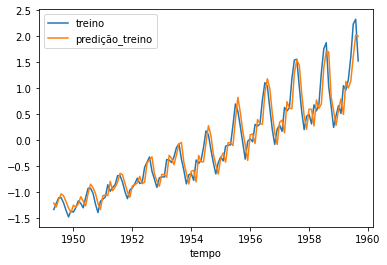

In [110]:
# Plotando:

# Dados de treino
sns.lineplot(x = 'tempo', y = y_treino_novo, data = passageiros[4:129], label = 'treino')

# Predição dos dados de treino
sns.lineplot(x = 'tempo', y = resultado_treino.values, data = passageiros[4:129], label = 'predição_treino')

<AxesSubplot:xlabel='tempo'>

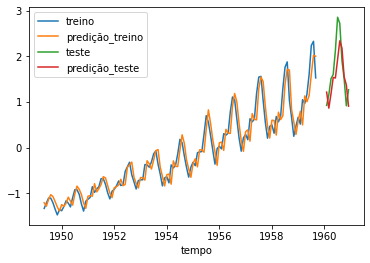

In [112]:
# Plotando com os dados de teste:

# Dados de treino
sns.lineplot(x = 'tempo', y = y_treino_novo, data = passageiros[4:129], label = 'treino')

# Predição dos dados de treino
sns.lineplot(x = 'tempo', y = resultado_treino.values, data = passageiros[4:129], label = 'predição_treino')

# Dados de teste
sns.lineplot(x = 'tempo', y = y_teste_novo, data = passageiros[133:144], label = 'teste')

# Predição dos dados de teste
sns.lineplot(x = 'tempo', y = resultado_teste.values, data = passageiros[133:144], label = 'predição_teste')

## Utilizando uma nova base de dados

In [113]:
bicicletas = pd.read_csv('dados/bicicletas.csv')

bicicletas.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [119]:
# Convertendo as datas para que possam ser plotadas:

bicicletas['datas'] = pd.to_datetime(bicicletas['datas'])

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

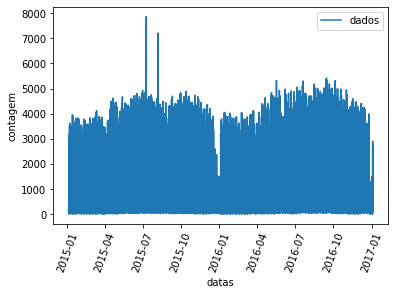

In [118]:
# Plotando os dados

sns.lineplot(x = 'datas', y = 'contagem', data = bicicletas, label = 'dados')
plt.xticks(rotation = 70)

### Como no final do problema anterior, passaremos a contagem como dados de entrada e também de saída.

In [120]:
# Precisamos escalonar os dados:

sc2 = StandardScaler()

In [121]:
sc2.fit(bicicletas['contagem'].values.reshape(-1,1))

StandardScaler()

In [122]:
y = sc2.transform(bicicletas['contagem'].values.reshape(-1,1))

In [123]:
# Dividindo em dados de treino e dados de teste:

tamanho_treino = int(len(bicicletas)*0.9)
tamanho_teste = len(bicicletas) - tamanho_treino

In [124]:
y_treino = y[0:tamanho_treino]

y_teste = y[tamanho_treino:len(bicicletas)]

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

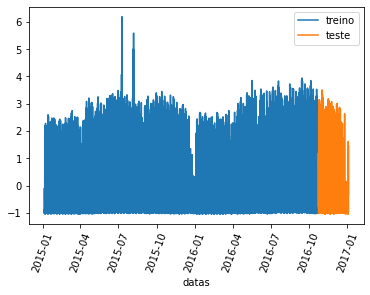

In [126]:
# Dados de treino
sns.lineplot(x = 'datas', y = y_treino[:,0], data = bicicletas[0:tamanho_treino], label = 'treino')

# Dados de teste:
sns.lineplot(x = 'datas', y = y_teste[:,0], data = bicicletas[tamanho_treino:len(bicicletas)], label = 'teste')

plt.xticks(rotation = 70)

# Utilizando a função separa_dados

In [127]:
vetor = pd.DataFrame(y_treino)[0]

In [128]:
x_treino_novo, y_treino_novo = separa_dados(vetor, 10)

In [129]:
x_treino_novo

array([[-0.88574518, -0.9262953 , -0.92998167, ..., -0.9843557 ,
        -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, ..., -0.93274645,
        -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, ..., -0.77607553,
        -0.56687377, -0.38347663],
       ...,
       [-0.02774148, -0.29131727, -0.4323211 , ..., -0.72630948,
        -0.8534894 , -0.91523618],
       [-0.29131727, -0.4323211 , -0.51065656, ..., -0.8534894 ,
        -0.91523618, -0.9548647 ],
       [-0.4323211 , -0.51065656, -0.55212827, ..., -0.91523618,
        -0.9548647 , -0.9548647 ]])

In [130]:
# Utilizando a função para os dados de teste

vetor2 = pd.DataFrame(y_teste)[0]

x_teste_novo, y_teste_novo = separa_dados(vetor2,10)

### Redes Neurais Recorrentes: Sugere-se utilizar quando os resultados são correlacionados - armazena a informação anterior

### As redes recorrentes esperam, como dados de entrada, uma matriz 3d. A terceira dimensão é a quantidade de atributos (nesse caso, temos apenas 1 atributo: o tempo).

In [131]:
# Redimensionando os dados de treino:

x_treino_novo = x_treino_novo.reshape((x_treino_novo.shape[0], x_treino_novo.shape[1], 1))

In [132]:
# Redimensionando os dados de teste:

x_teste_novo = x_teste_novo.reshape((x_teste_novo.shape[0], x_teste_novo.shape[1], 1))

### Criando as camadas da rede neural recorrente:

In [134]:
recorrente = Sequential()

In [137]:
from tensorflow.keras.layers import LSTM

In [138]:
# LSTM é um tipo de rede recorrente:
recorrente.add(LSTM(128, input_shape = (x_treino_novo.shape[1], x_treino_novo.shape[2])))

# Camada de saída:
recorrente.add(Dense(units = 1))

In [139]:
# Compilando:

recorrente.compile(loss = 'mean_squared_error', optimizer = 'RMSProp')

In [140]:
recorrente.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_22 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


### LSTM: Long Short Term Memory. Long Short Term Memory significa memória de longo prazo, e ela é importante, porque em séries muito longas, uma rede neural recorrente comum não consegue lidar muito bem com essas séries muito longas, não enxergando muito bem os padrões que aparecem lá atrás na série.

### Outro ponto importante nas redes recorrentes, é a atualização dos pesos, como nós podemos ter muitas camadas escondidas e muitos loops em cada uma das camadas, conforme nós vamos atualizando os pesos por conta do caráter sequencial da série, cada vez nós vamos voltando na série e atualizando menos os pesos, e isso é um problema, porque a atualização dos pesos é importante para que a rede aprenda. O nome dessa atualização dos pesos se esvaindo, digamos assim, é vanishing gradient, ou o gradiente se esvaindo.

### Uma forma de lidar com esse problema, é inicializando os pesos com uma distribuição adequada como a glorot uniform ou a glorot normal, mas no keras, a glorot uniform já é a inicialização dos pesos utilizados por padrão, então, não precisamos nos preocupar com esse problema.

### Otimizador RMSProp: serve para tratar o problema do gradiente explodindo, ou seja, o gradiente aumentando muito ou exploding gradient. A RMSProp é utilizada para tratar esse problema, porque se o gradiente aumentar muito, nós também não conseguimos estimar os pesos de forma adequada e logo a rede não consegue aprender.

### Foi escolhido o RMSProp como otimizador dos pesos no treinamento da rede neural. O objetivo foi utilizar um otimizador adaptativo. Um otimizador adaptativo é capaz de controlar o gradiente e evitar que este cresça ou diminua muito. Entretanto, a escolha do RMSProp foi feita para chamar a atenção sobre o otimizador. Tanto o Adam quanto o RMSProp são adaptativos e seriam boas escolhas para a solução do problema.

In [141]:
# Treinamento:

# Aqui também podemos passar os dados de teste (validation_data)

treinamento = recorrente.fit(x_treino_novo, y_treino_novo, validation_data = (x_teste_novo, y_teste_novo), epochs = 100)

Epoch 1/100
490/490 [==============================] - 5s 7ms/step - loss: 0.2457 - val_loss: 0.0833
Epoch 2/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0771 - val_loss: 0.0399
Epoch 3/100
490/490 [==============================] - 4s 7ms/step - loss: 0.0536 - val_loss: 0.0369
Epoch 4/100
490/490 [==============================] - 4s 7ms/step - loss: 0.0453 - val_loss: 0.0264
Epoch 5/100
490/490 [==============================] - 4s 7ms/step - loss: 0.0419 - val_loss: 0.0366
Epoch 6/100
490/490 [==============================] - 4s 7ms/step - loss: 0.0386 - val_loss: 0.0259
Epoch 7/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0366 - val_loss: 0.0224
Epoch 8/100
490/490 [==============================] - 3s 6ms/step - loss: 0.0352 - val_loss: 0.0228
Epoch 9/100
490/490 [==============================] - 3s 6ms/step - loss: 0.0337 - val_loss: 0.0217
Epoch 10/100
490/490 [==============================] - 3s 6ms/step - loss: 0.0325 - val_lo

In [146]:
# predição dos dados de treino

y_ajustado = recorrente.predict(x_treino_novo)

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

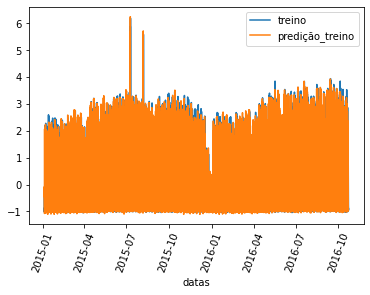

In [147]:
# Plotando:

# Dados de treino
sns.lineplot(x = 'datas', y = y_treino[:,0], data = bicicletas[0:tamanho_treino], label = 'treino')

# Predição treino
sns.lineplot(x = 'datas', y = y_ajustado[:,0], data = bicicletas[0:15662], label = 'predição_treino')

plt.xticks(rotation = 70)

In [148]:
# predição dos dados de teste

y_predito = recorrente.predict(x_teste_novo)

<AxesSubplot:xlabel='datas'>

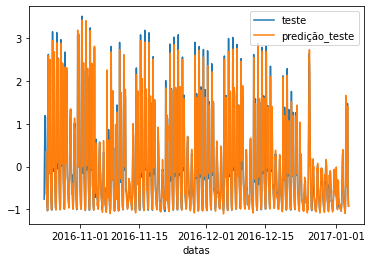

In [150]:
# Plotando os dados de teste:
sns.lineplot(x = 'datas', y = y_teste[:, 0], data = bicicletas[tamanho_treino:len(bicicletas)], label = 'teste')

# Plotando as predições:
sns.lineplot(x = 'datas', y = y_predito[: ,0], data = bicicletas[tamanho_treino+10:len(bicicletas)], label = 'predição_teste')

### Além da LSTM, temos também as GRU, que fazem um treinamento mais rápido, pois possuem menos parâmentros para treinar. No entanto, as LSTMs conseguem "lembrar" de sequências maiores.

### Assim sendo, as GRU são utilizadas para sequências menores e as LSTMs quando temos mais dados.

### Testando a GRU:

In [162]:
from tensorflow.keras.layers import GRU

recorrente_gru = Sequential()

In [163]:
# Criando as camadas:

recorrente_gru.add(GRU(128, input_shape = (x_treino_novo.shape[1], x_treino_novo.shape[2])))

# Camada de saída:

recorrente_gru.add(Dense(units=1))

recorrente_gru.summary()

# Comparando com a LSTM:
recorrente.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_9 (GRU)                 (None, 128)               50304     
                                                                 
 dense_25 (Dense)            (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_22 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Traina

In [165]:
# Compilando:

recorrente_gru.compile(loss = 'mean_squared_error', optimizer = 'RMSProp')

In [166]:
# Treinamento:

treinamento_gru = recorrente_gru.fit(x_treino_novo, y_treino_novo,
                                     validation_data = (x_teste_novo, y_teste_novo), epochs =100)

Epoch 1/100
490/490 [==============================] - 6s 8ms/step - loss: 0.2226 - val_loss: 0.0834
Epoch 2/100
490/490 [==============================] - 4s 7ms/step - loss: 0.0697 - val_loss: 0.0341
Epoch 3/100
490/490 [==============================] - 4s 7ms/step - loss: 0.0507 - val_loss: 0.0312
Epoch 4/100
490/490 [==============================] - 4s 7ms/step - loss: 0.0422 - val_loss: 0.0231
Epoch 5/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0386 - val_loss: 0.0223
Epoch 6/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0361 - val_loss: 0.0220
Epoch 7/100
490/490 [==============================] - 3s 6ms/step - loss: 0.0344 - val_loss: 0.0238
Epoch 8/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0331 - val_loss: 0.0280
Epoch 9/100
490/490 [==============================] - 3s 7ms/step - loss: 0.0315 - val_loss: 0.0222
Epoch 10/100
490/490 [==============================] - 3s 6ms/step - loss: 0.0306 - val_lo

In [167]:
# Predição dados de teste

y_predito2 = recorrente_gru.predict(x_teste_novo)

<AxesSubplot:xlabel='datas'>

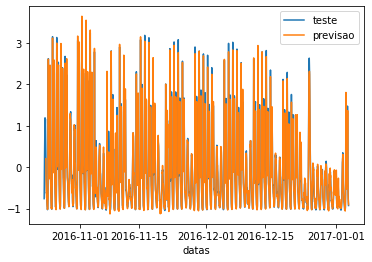

In [169]:
# Plotando o resultado

sns.lineplot(x = 'datas', y = y_teste[:, 0], data = bicicletas[tamanho_treino:len(bicicletas)], label = 'teste')
sns.lineplot(x = 'datas', y = y_predito2[:, 0], data = bicicletas[tamanho_treino+10:len(bicicletas)], label = 'previsao')

### Qual das 2 ficou melhor: LSTM ou GRU?

In [181]:
# LSTM: custo dos dados de teste

print(treinamento.history.keys())

dict_keys(['loss', 'val_loss'])


In [180]:
# GRU: custo dos dados de teste

print(treinamento_gru.history.keys())

dict_keys(['loss', 'val_loss'])


Text(0, 0.5, 'Custo')

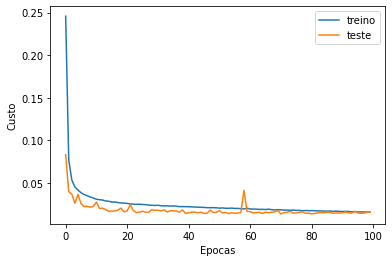

In [186]:
# Dados de treino : azul, dados de teste: laranja - LSTM

plt.plot(treinamento.history['loss'])
plt.plot(treinamento.history['val_loss'])
plt.legend(['treino', 'teste'])
plt.xlabel('Epocas')
plt.ylabel('Custo')

Text(0, 0.5, 'Custo')

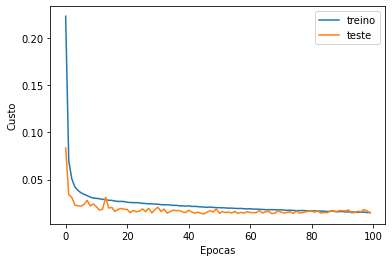

In [187]:
# Dados de treino : azul, dados de teste: laranja - LSTM

plt.plot(treinamento_gru.history['loss'])
plt.plot(treinamento_gru.history['val_loss'])
plt.legend(['treino', 'teste'])
plt.xlabel('Epocas')
plt.ylabel('Custo')

### Neste caso, como os resultados foram parecidos, melhor usar GRU que tem menor tempo de processamento de treino.